# importing the necessary Python libraries

In [1]:
import nltk
import string
from heapq import nlargest

# Prepare and read the text Data

In [2]:
with open("ML.txt","r", encoding="utf8") as f:
    text=f.read()

In [3]:
print(text)

machine learning

Ed Burns
By
Ed Burns, Executive Editor
What is machine learning?
Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. Machine learning algorithms use historical data as input to predict new output values.

Recommendation engines are a common use case for machine learning. Other popular uses include fraud detection, spam filtering, malware threat detection, business process automation (BPA) and predictive maintenance.

Why is machine learning important?
Machine learning is important because it gives enterprises a view of trends in customer behavior and business operational patterns, as well as supports the development of new products. Many of today's leading companies, such as Facebook, Google and Uber, make machine learning a central part of their operations. Machine learning has become a significant competitive differentiator for m

# Generate Word Cloud Image

there are 5935 words in all text.


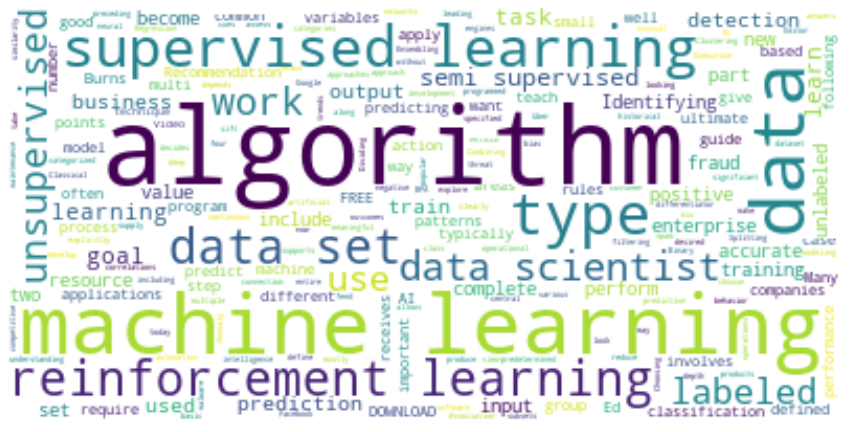

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#print(STOPWORDS)
print("there are {} words in all text.". format(len(text)))

WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(WC,interpolation='bilinear')
plt.axis("off")
plt.show()

# Keyword Extraction

In [20]:
from rake_nltk import Rake
rk=Rake()

rk.extract_keywords_from_text(text)
extract_keyword=rk.get_ranked_phrases()
extract_keyword

['various techniques 10 common uses',
 'machine learning algorithms use historical data',
 'data scientists typically use reinforcement learning',
 'machine learning download 1 download',
 'popular uses include fraud detection',
 'algorithm mostly labeled training data',
 'data scientists may feed',
 'multiple machine learning models',
 'data scientists supply algorithms',
 'supervised machine learning requires',
 'algorithm data scientists choose',
 'seek positive rewards --',
 'data scientists also program',
 'machine learning involves algorithms',
 'supervised machine learning work',
 'unsupervised machine learning work',
 'identifying unusual data points',
 'unsupervised machine learning algorithms',
 'machine learning ed burns',
 'common use case',
 'predict new output values',
 'algorithms typically improves',
 'data scientists program',
 'reinforcement learning work',
 'machine learning involves',
 'data scientists feeding',
 'supervised learning work',
 'labeled training data',

# Text Summarization 

In [69]:
print(text.count("."))
print(string.punctuation)
nopuch=[char for char in text if char not in string.punctuation]
nopuch="".join(nopuch)
#print(nopuch)

process_text=[word for word in nopuch.split() if word.lower() not in nltk.corpus.stopwords.words('english')]
#print(process_text)

#create word freq
word_freq={}
for word in process_text:
    if word not in word_freq:
        word_freq[word]=1
    else:
        word_freq[word]=word_freq[word]+1

#dict(sorted(word_freq.items(),key=lambda item:item[1], reverse=True))

max_freq=max(word_freq.values())

for word in word_freq.keys():
    word_freq[word]=(word_freq[word]/max_freq)

#create sent freq
sent_list=nltk.sent_tokenize(text)

sent_score={}
for sent in sent_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_freq.keys():
            if sent not in sent_score.keys():
                sent_score[sent]=word_freq[word]
            else:
                sent_score[sent]=sent_score[sent]+word_freq[word]
                
#dict(sorted(sent_score.items(),key=lambda item:item[1], reverse=True))
       
summary_sent=nlargest(3,sent_score, key=sent_score.get)

summary=" ".join(summary_sent)

summary

45
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


"THIS ARTICLE IS PART OF\n\nIn-depth guide to machine learning in the enterprise\nWhich also includes:\nLearn the business value of AI's various techniques\n10 common uses for machine learning applications in business\n6 ways to reduce different types of bias in machine learning\nDOWNLOAD\n1\nDownload this entire guide for FREE now! Supervised learning: In this type of machine learning, data scientists supply algorithms with labeled training data and define the variables they want the algorithm to assess for correlations. There are four basic approaches: supervised learning, unsupervised learning, semi-supervised learning and reinforcement learning."